In [10]:
import os
import cv2
import matplotlib.pyplot as plt
import struct
%matplotlib inline
import sys 
print(sys.path)
print(sys.version)

['', '/home/jiangdong/workspace/dateset_process/oxford', '/home/jiangdong/workspace/dateset_process/oxford/~/.local/lib/python3.5/site-packages', '/usr/lib/python35.zip', '/usr/lib/python3.5', '/usr/lib/python3.5/plat-x86_64-linux-gnu', '/usr/lib/python3.5/lib-dynload', '/home/jiangdong/.local/lib/python3.5/site-packages', '/usr/local/lib/python3.5/dist-packages', '/usr/lib/python3/dist-packages', '/home/jiangdong/.local/lib/python3.5/site-packages/IPython/extensions', '/home/jiangdong/.ipython']
3.5.1+ (default, Mar 30 2016, 22:46:26) 
[GCC 5.3.1 20160330]


In [11]:
class Struct():
    def __init__(self):
        pass
args = Struct()
args.query_path='/share/dong/Data/OxfordBuilding/gtfiles/'
args.image_path='/share/dong/Data/OxfordBuilding/images/'

In [12]:
def get_roi(query_path):
    roi_dict = {}
    filelist = os.listdir(query_path)
    for item in filelist:
        if item.endswith('_query.txt'):
            path = query_path + item
            with open(path,'r') as query_file:
                line = query_file.read().strip().split(' ')
                img_name = line[0]
                ROI = [int(float(t)) for t in line[1:]]
                roi_dict[item[:-10]]=(img_name,ROI)
    return roi_dict
roi_dict = get_roi(args.query_path)


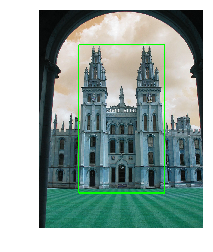

In [13]:
def draw_roi(path,name,roi):
    img_path = path + name[5:] +'.jpg'
    img=cv2.imread(img_path)
    color = (0,255,0)
    pt1,pt2 = tuple(roi[:2]),tuple(roi[2:])
    img=cv2.rectangle(img,pt1,pt2,color,3)
    return img
name,roi=roi_dict['all_souls_3']
img = draw_roi(args.image_path, name, roi)
plt.axis('off')
plt.imshow(img)

In [14]:
def get_roi_img(path,name,roi):
    img_path = path + name[5:] +'.jpg'
    img=cv2.imread(img_path)
    color = (0,255,0)
    pt1,pt2 = tuple(roi[:2]),tuple(roi[2:])
    return img[pt1[1]:pt2[1],pt1[0]:pt2[0]]
name,roi=roi_dict['all_souls_3']
print(name)
img = get_roi_img(args.image_path, name, roi)
plt.axis('off')
plt.imshow(img)

KeyError: 'pitt_rivers_000073'

In [7]:
import numpy as np
print(cv2.__version__)
def get_sift(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    sift = cv2.xfeatures2d.SIFT_create()
    kp   = sift.detect(gray,None)
    des = sift.compute(gray,kp)
    print(des[1].shape)
    return des[1]
#     print(type(kp),type(des))
#     print(type(des[0]),type(des[1]))
#     print(des[0][0].pt)
#     print(des[1][0])
name,roi=roi_dict['all_souls_1']
img = get_roi_img(args.image_path, name, roi)
get_sift(img)

3.4.2
(2164, 128)


array([[16., 99., 34., ...,  0.,  0., 49.],
       [ 0.,  0.,  9., ...,  2.,  8., 39.],
       [ 2., 35., 19., ..., 44.,  7.,  9.],
       ...,
       [90., 16., 12., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  6.,  0.,  0.],
       [ 0.,  0.,  0., ..., 13.,  3.,  2.]], dtype=float32)

In [7]:
sift_file="/share/dong/Data/OxfordBuilding/feat/feat_oxc1_hesaff_sift.bin"
with open(sift_file,'rb') as sift_input:
    for i in range(10):
        buff = sift_input.read(128)
        buff = struct.unpack('128B',buff)
        print(buff)

(38, 18, 4, 1, 4, 6, 5, 1, 83, 42, 17, 5, 3, 1, 0, 4, 1, 33, 51, 43, 12, 0, 0, 0, 78, 4, 10, 48, 19, 1, 0, 13, 91, 50, 16, 11, 10, 3, 0, 13, 119, 78, 36, 22, 1, 0, 0, 14, 58, 78, 75, 78, 62, 0, 0, 1, 117, 0, 4, 57, 119, 5, 0, 26, 92, 63, 2, 4, 4, 4, 21, 27, 119, 34, 15, 18, 0, 5, 76, 67, 82, 22, 4, 38, 73, 67, 119, 50, 72, 0, 0, 20, 119, 80, 26, 30, 13, 6, 0, 0, 0, 4, 56, 25, 7, 1, 1, 1, 1, 14, 119, 39, 3, 2, 2, 3, 3, 36, 119, 23, 4, 1, 1, 0, 12, 45, 49, 10)
(110, 50, 4, 1, 0, 0, 1, 15, 68, 36, 46, 52, 1, 10, 57, 29, 0, 0, 37, 49, 2, 10, 106, 42, 1, 1, 10, 11, 2, 1, 87, 68, 127, 37, 2, 1, 0, 0, 1, 6, 127, 34, 48, 62, 13, 18, 16, 5, 0, 0, 38, 93, 87, 35, 8, 1, 0, 0, 5, 27, 55, 20, 25, 17, 127, 12, 0, 0, 1, 1, 3, 25, 125, 6, 0, 3, 49, 84, 38, 17, 0, 0, 0, 2, 52, 127, 77, 4, 0, 0, 0, 10, 44, 34, 36, 14, 73, 0, 0, 0, 0, 0, 29, 78, 27, 0, 0, 7, 31, 60, 127, 74, 0, 0, 0, 14, 52, 96, 74, 10, 0, 0, 0, 3, 2, 4, 44, 43)
(102, 28, 1, 1, 3, 0, 0, 0, 85, 39, 24, 70, 11, 0, 0, 11, 11, 9, 25, 27, 1, 